In [0]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [0]:
class Network(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        self.inp = nn.Linear(in_size, hidden_size)
        #self.hidden = nn.Linear(hidden_size[0], hidden_size[1])
        self.out = nn.Linear(hidden_size, out_size)

    def forward(self, x):
        x = F.relu(self.inp(x))
       # x = F.relu(self.hidden(x))
        return self.out(x)

In [0]:
def train(model, criterion, optimizer, x, y, epochs):
    model.train()
    for e in range(epochs):
        x, y = x.float(), y.float()
        optimizer.zero_grad()
        output = model.forward(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    return model

def test(model, x, y):
    model.eval()
    with torch.no_grad():
        output = model.forward(x.float())

    print(f"R2 Score: {r2_score(y, output)}")

    plt.clf()
    plt.xlabel('Car Purchase Amount')
    plt.ylabel('Net Worth of Customer')
    plt.title('ANN Model')
    plt.plot(x, y, 'go', label='True Data', alpha=0.5)
    plt.plot(x, output, '--', label='Prediction', alpha=0.5)
    plt.legend(loc='best')
    plt.show()

In [0]:
def main():
    df = pd.read_csv('/content/sample_data/Car_Purchasing_Data.csv')
    data = np.array(df[['Car Purchase Amount', 'Net Worth']].values)
    data = torch.from_numpy(data)

    X_train, X_test, Y_train, Y_test = train_test_split(data[:, 0], data[:, 1], train_size=0.8, shuffle=False)
    X_train, X_test, Y_train, Y_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1), Y_train.reshape(-1, 1), \
                                       Y_test.reshape(-1, 1)

    inp_size = 1
    hidden_size = 256
    out_size = 1
    epochs = 5000

    model = Network(inp_size, hidden_size, out_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.2)

    c_model = train(model, criterion, optimizer, X_train, Y_train, epochs)

    test(c_model, X_test, Y_test)

R2 Score: 0.26632048312944023


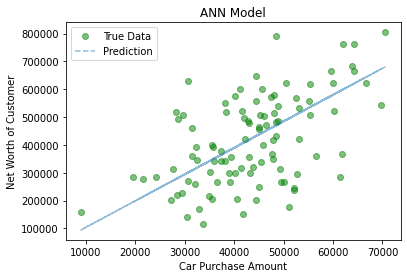

In [16]:
if __name__ == '__main__':
    main()